<a href="https://colab.research.google.com/github/vontalha/DL4NLP/blob/main/HW_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
### Note for the homework: You can add further images or comments in the submitted PDF file if you don't want to do it here.

from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My Drive/Colab Notebooks/

# **Task 1:  Activation Function**

## **Task 1.1: Sigmoid**

When optimizing functions, first or higher-order derivatives (gradients, Hessians) are of major importance. In neural network learning, we typically want to minimize weight parameters so that the difference between the net output and the true labels is minimized, e.g.

### $\quad\text{min}_\mathbf{w}\sum_{j=1}^N \Bigl(\sigma(\mathbf{x}_j \cdot \mathbf{w})-y_j\Bigr)^2$

Here, $\sigma$ is an activation function. A frequently used activation function is the *sigmoid* function, defined as:

### $\quad\text{sig}(x) = \frac{1}{1+\exp(-x)} .$

Show that:

### $\quad\text{sig}'(x) = \text{sig}(x) \cdot \bigl(1-\text{sig}(x)\bigr) .$

You may find the chain rule useful: $f(g(x))' = f'(g(x))\cdot g'(x)$.

******************************
### YOUR ANSWER HERE (Double click or enter to edit)
******************************

## **Task 1.2: A different kind of activation function**

Sigmoid or the hyperbolic tangent function activation are considered as conventional activation functions for neural networks. Can you identify another activation function that distinguishes itself from the ones mentioned? State the formula for this activation function along with its fundamental difference from the conventional ones.

******************************
### YOUR ANSWER HERE (Double click or enter to edit)
******************************

# **Task 2: TensorFlow Playground**

TensorFlow offers a playground for experimenting with neural networks in a web browser: https://playground.tensorflow.org.

## **Task 2.1: Cicular Dataset**

Take a look at the circular dataset in the figure below. Can a perceptron architecture (no hidden layers) learn a good discriminator for this dataset? Justify your answer. Write at most two sentences.

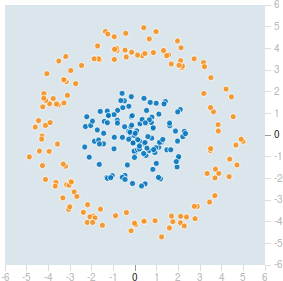

******************************
No, a basic perceptron with features x and y of the dataset can only learn linear functions, but the given dataset requires non-linearity as it cannot be separated by a straight line (i.e. a linear boundary).

However, if we incorporate the features  𝑥^2,𝑦^2 , it is possible to learn a good distriminator, since we can generate a good decision boundary with the squared terms.******************************

## **Task 2.2: MLP**

In a multi-layer perceptron, the number of neurons can be chosen differently for each hidden layer. Pick the spiral dataset and specify at least four hidden layers. Then, try out three different scenarios:

* Same amount of neurons in every hidden layer.
* More neurons towards the input, less neurons towards the output.
* Less neurons towards the input, more neurons towards the output.

Which scenario produces the best results on the test set?
Which scenario converges the fastest?
Why do you think that is the case?
Explain in up to three sentences.



more neurons closer to the input result in the model to converge faster to the optimum. Thats because Neurons closer to the input are able to learn low-level features without making the model too complex and without overfitting it to the data. Whereas Neurons towards the output learn abstract features better but are more susceptible for overfitting. An exmaple which illustrates the problem of overfitting for more neurons to the output is learning facial features. In the last layer Neurons are activated for faces by combining eyes nose and mouth feautures from previous layer. This results in the model being more inclined to memorize certain faces rather than learning the abstract facial features.

# **Task 3: Word Similarity with Word Embeddings**

## **Task 3.1: Setup**

For this homework, you will need:
* the gensim python library: https://radimrehurek.com/gensim (included in the colab environment),
* the binary pretrained 300-dimensional word2vec embeddings from Google: https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit?usp=sharing (you have to extract them), and
* the SimLex-999 data set: https://fh295.github.io/SimLex-999.zip, is an extension of WS353 which is a set of word pairs along with their similarity that is derived from human ratings.

## **Task 3.2: Data Reader**

In the **SimLex-999.txt** file from the Simlex-999 dataset, each row contains two words and a mean similarity score assigned by humans. The values are separated by tab characters (**\t**). Please refer to **README.txt** for more details. Write a python method which reads the dataset into an appropriate format.

Print the SimLex-999-based similarities between the pairs (easy, difficult), (simple, easy) and (easy, big) and report them.


In [ ]:
import pandas as pd

def read_dataset(path):
  return pd.read_csv(path, sep="\t")


# !unzip "/content/drive/MyDrive/Colab Notebooks/DL4NLP/SimLex-999.zip"
simlex_df = read_dataset("/content/drive/MyDrive/Colab Notebooks/SimLex-999.txt")

print("Similarity(easy,difficult): ",simlex_df.loc[(simlex_df["word1"] == "easy") & (simlex_df["word2"] == "difficult")].SimLex999.tolist()[0])
print("Similarity(simple,easy): ",simlex_df.loc[(simlex_df["word1"] == "simple") & (simlex_df["word2"] == "easy")].SimLex999.tolist()[0])
print("Similarity(easy,big): ",simlex_df.loc[(simlex_df["word1"] == "easy") & (simlex_df["word2"] == "big")].SimLex999.tolist()[0])

"""
output:
Similarity(easy,difficult):  0.58
Similarity(simple,easy):  9.4
Similarity(easy,big):  1.12
"""

## **Task 3.3: Ranking Based on word2vec**

Load the pretrained binary word2vec embeddings with gensim, then compute the similarity between each word pair $(a,b)$. To do so, calculate the cosine similarity between their vectors $\mathbf{a}$ and $\mathbf{b}$:

$\quad cos(\theta)=\frac{a * b}{\|a\|*\|b\|}$

If you run into memory errors because the embeddings are too large, you may use the **limit** parameter of the **load_word2vec_format** method.

Do not use a limit lower than 50 000. There may be out of vocabulary (OOV) words, i.e., words in SimLex-999 for which there is no corresponding vector in the embedding file. Assign these words zero vectors.

Print the word2vec-based distances between the pairs (easy, difficult), (simple, easy) and (easy, big) and report them.

Hints: https://radimrehurek.com/gensim/models/keyedvectors.html

In [ ]:
import pandas as pd
import gensim

def load_simlex999(path):
    df = pd.read_csv(path, sep="\t")
    print("Columns in the DataFrame:", df.columns)
    print("\nFirst few rows of the DataFrame:")
    print(df.head())
    return df

def get_similarity(word1, word2, model):
    if word1 in model and word2 in model:
        return model.similarity(word1, word2)
    else:
        return 0.0

model_path = "GoogleNews-vectors-negative300.bin"
model = gensim.models.KeyedVectors.load_word2vec_format(model_path, binary=True, limit=500000)

simlex_path = "SimLex-999/SimLex-999.txt"
simlex_df = load_simlex999(simlex_path)

required_columns = ['word1', 'word2']
if all(col in simlex_df.columns for col in required_columns):
    simlex_df['cosine_similarity'] = simlex_df.apply(lambda row: get_similarity(row['word1'], row['word2'], model), axis=1)

    print("\nSimilarities:")
    print("(easy,difficult):", get_similarity("easy", "difficult", model))
    print("(simple,easy):", get_similarity("simple", "easy", model))
    print("(easy,big):", get_similarity("easy", "big", model))
else:
    print(f"Error: Required columns {required_columns} not found in the DataFrame.")
    print("Available columns:", simlex_df.columns)

## **Task 3.4: Correlation**

[Pearson's correlation coefficient](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient) is a statistic that measures linear correlation between two variables.	Compute the coefficient between the values assigned by humans and your results from 1.3 using scipy. Print and report your coefficient.	Explain in two sentences what your resulting coefficient means.

In [ ]:
# YOUR CODE HERE